In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/Tharakh George/OneDrive/Desktop/bank-additional-full.csv", sep=";", encoding="utf-8")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
data.shape

(41188, 21)

In [4]:
data.size

864948

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
data.duplicated().sum()

12

In [8]:
data=data.drop_duplicates()

In [9]:
data.shape

(41176, 21)

In [10]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
data['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

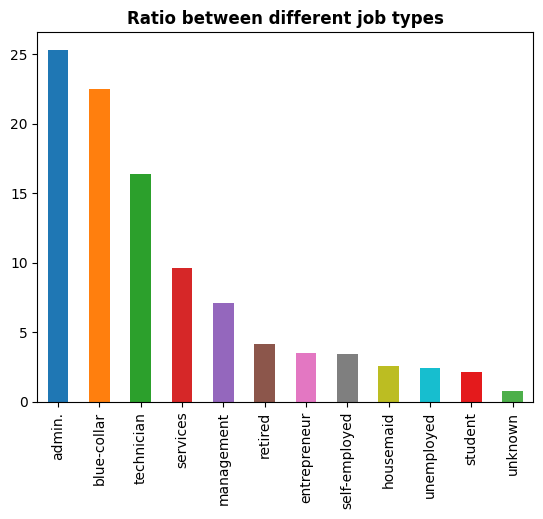

In [12]:
plt.title('Ratio between different job types',fontweight='bold')
round(data['job'].value_counts()/data.shape[0]*100,2).plot.bar(color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#e41a1c", "#4daf4a"])
plt.show()

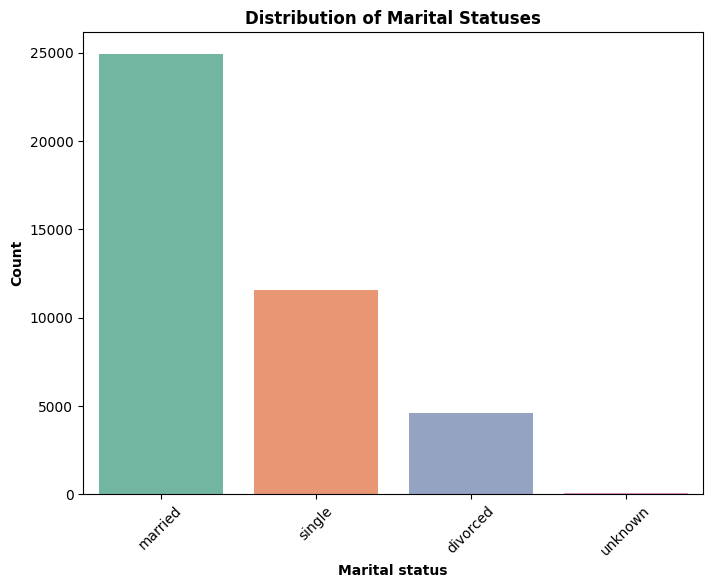

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='marital', palette='Set2')
plt.xlabel('Marital status',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Distribution of Marital Statuses',fontweight='bold')
plt.xticks(rotation=45)
plt.show()

In [14]:
data['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

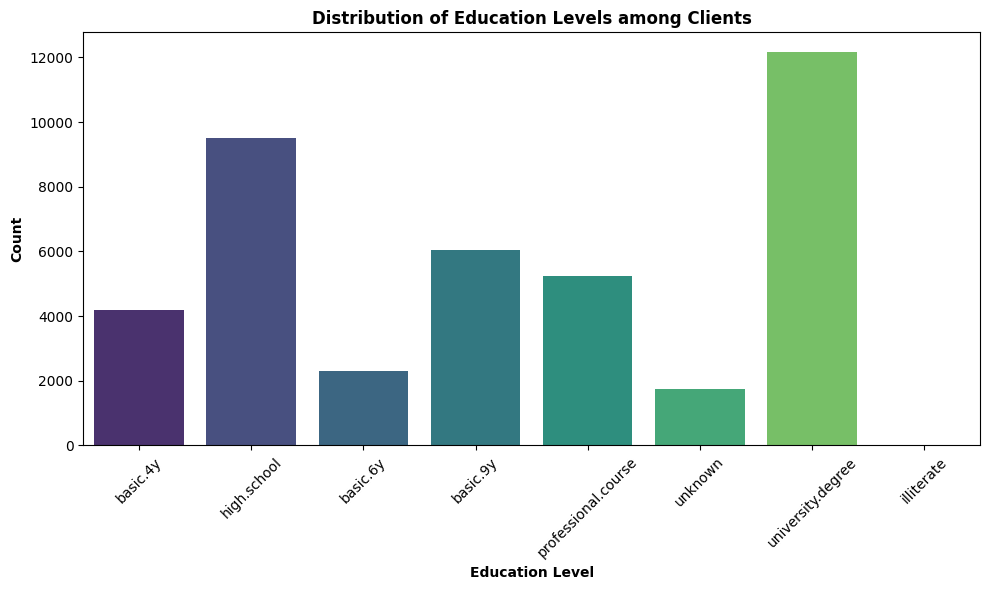

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='education', palette='viridis')
plt.xlabel('Education Level',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Distribution of Education Levels among Clients',fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

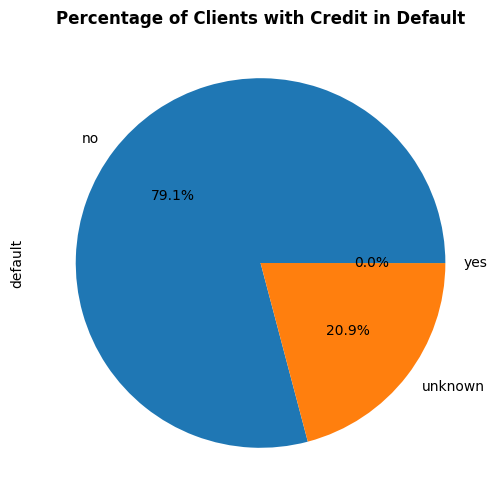

In [16]:
plt.figure(figsize=(6, 6))
data['default'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percentage of Clients with Credit in Default',fontweight='bold')
plt.show()

In [17]:
data['default'].value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

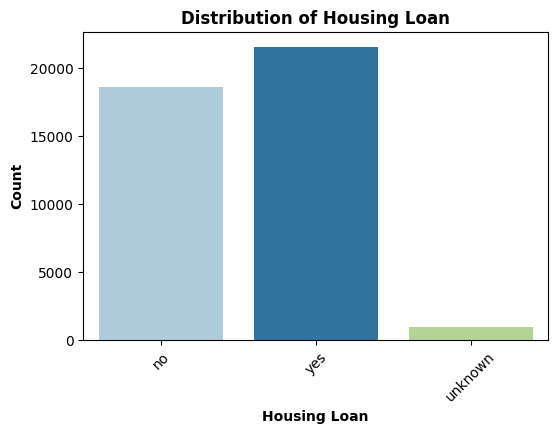

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='housing', palette='Paired')
plt.xlabel('Housing Loan',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Distribution of Housing Loan',fontweight='bold')
plt.xticks(rotation=45)
plt.show()

In [19]:
data.housing.value_counts()

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

In [20]:
data.loan.value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

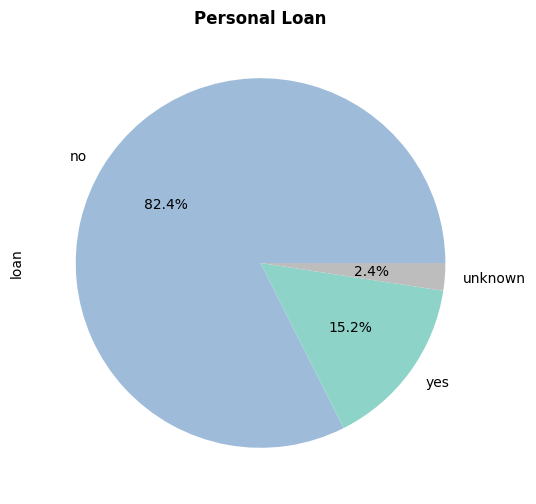

In [21]:
plt.figure(figsize=(6, 6))
data['loan'].value_counts().plot.pie(autopct='%1.1f%%',colors=['#9ebcda','#8dd3c7','#bdbdbd'])
plt.title('Personal Loan',fontweight='bold')
plt.show()

In [22]:
data['contact'].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

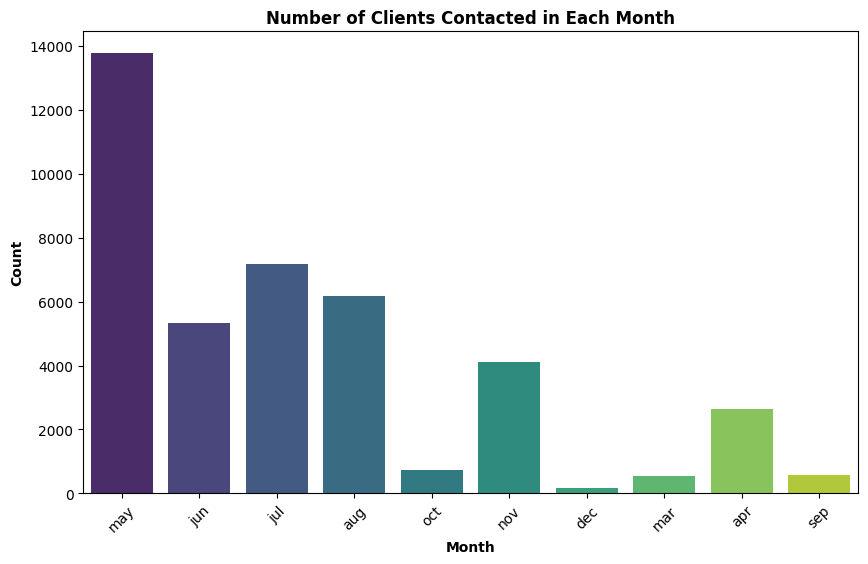

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='month', palette='viridis')
plt.title('Number of Clients Contacted in Each Month',fontweight='bold')
plt.xlabel('Month',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.xticks(rotation=45)
plt.show()

In [24]:
data['month'].value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

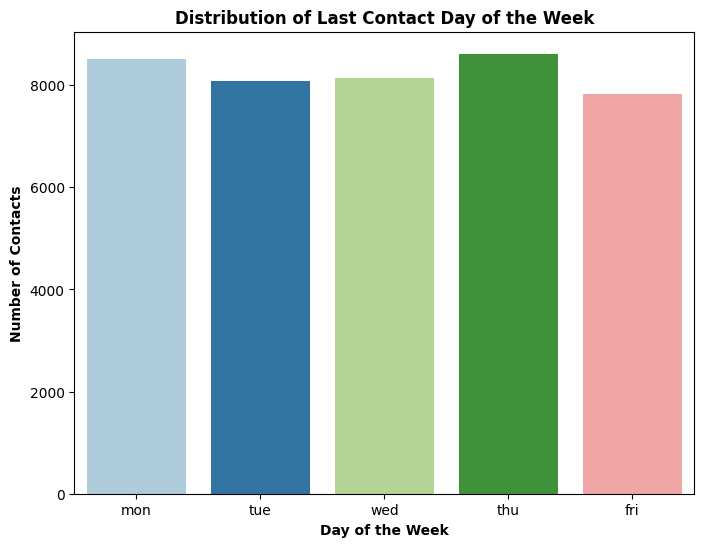

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='day_of_week',palette='Paired')
plt.xlabel('Day of the Week',fontweight='bold')
plt.ylabel('Number of Contacts',fontweight='bold')
plt.title('Distribution of Last Contact Day of the Week',fontweight='bold')
plt.show()

In [26]:
#Average duration of the last contact during the campaign
average_duration = data['duration'].mean()
average_duration 

258.3158150378861

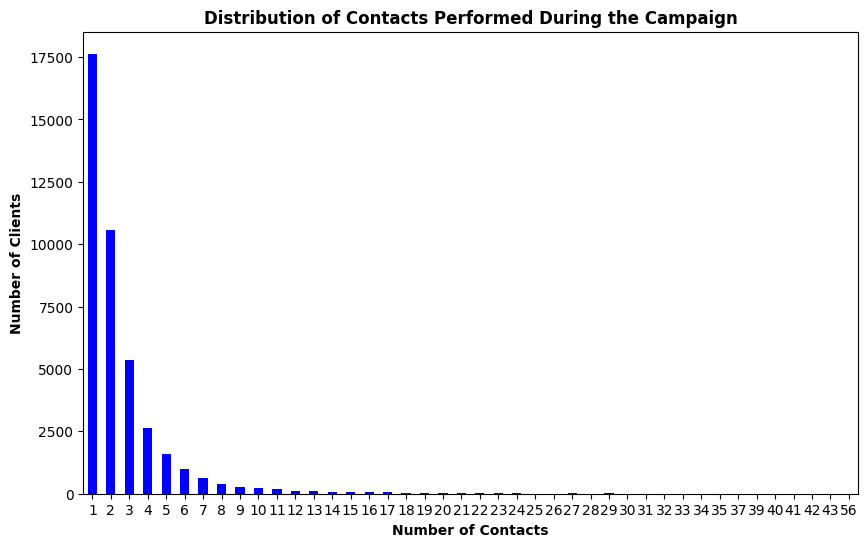

In [27]:
plt.figure(figsize=(10, 6))
data['campaign'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.xlabel('Number of Contacts',fontweight='bold')
plt.ylabel('Number of Clients',fontweight='bold')
plt.title('Distribution of Contacts Performed During the Campaign',fontweight='bold')
plt.xticks(rotation=0)
plt.show()

In [28]:
data['campaign'].value_counts()

1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

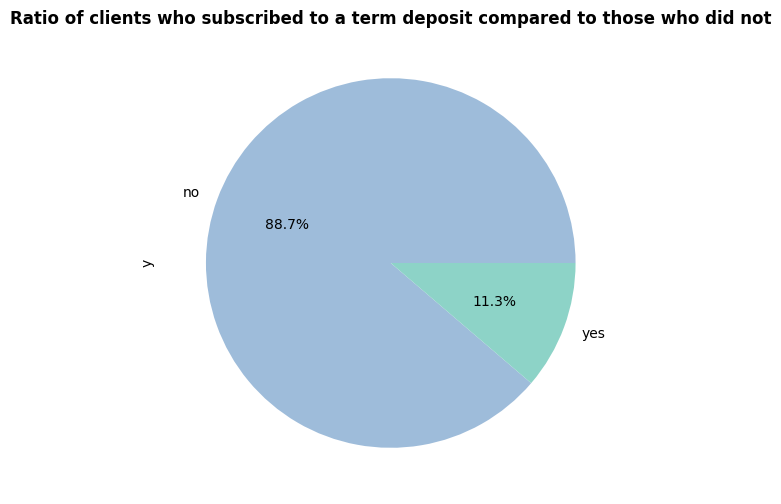

In [29]:
plt.figure(figsize=(6, 6))
data['y'].value_counts().plot.pie(autopct='%1.1f%%',colors=['#9ebcda','#8dd3c7','#bdbdbd'])
plt.title('Ratio of clients who subscribed to a term deposit compared to those who did not',fontweight='bold')
plt.show()

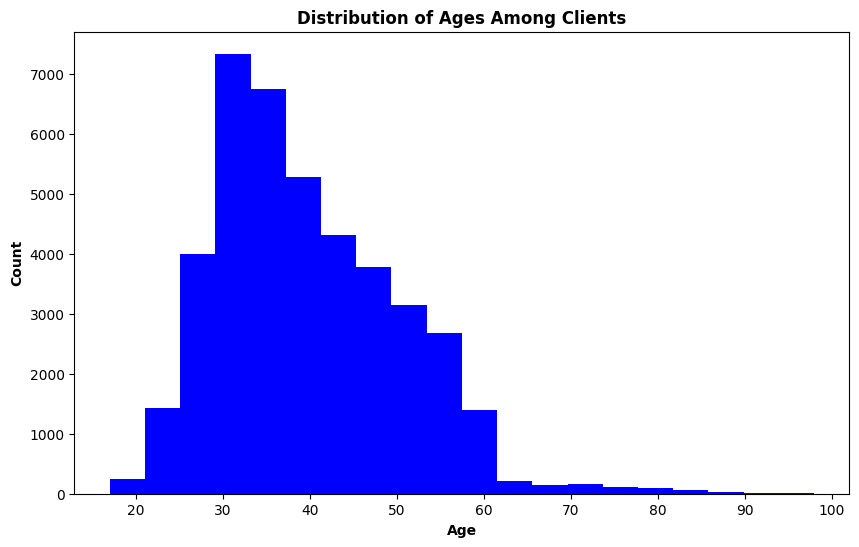

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=20, color='blue')
plt.xlabel('Age',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Distribution of Ages Among Clients',fontweight='bold')
plt.show()

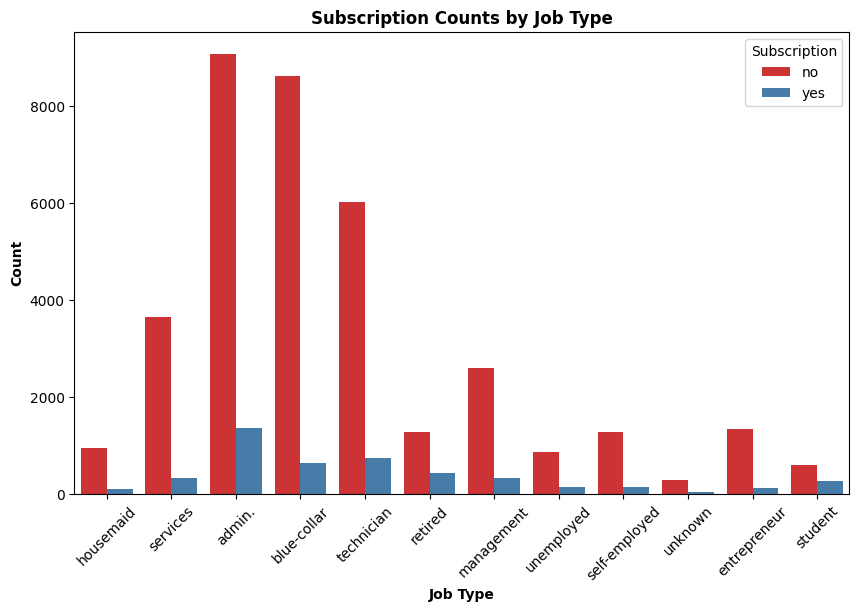

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='job', hue='y',palette='Set1')
plt.xlabel('Job Type',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Subscription Counts by Job Type',fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Subscription')
plt.show()

In [32]:
subscription_rates = data.groupby('contact')['y'].value_counts(normalize=True)
cellular_rate = subscription_rates['cellular']['yes']
telephone_rate = subscription_rates['telephone']['yes']
print(f"Subscription rate for Cellular: {cellular_rate:.2%}")
print(f"Subscription rate for Telephone: {telephone_rate:.2%}")

Subscription rate for Cellular: 14.74%
Subscription rate for Telephone: 5.23%


In [33]:
numcols = data.select_dtypes(include='number').columns
numcols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

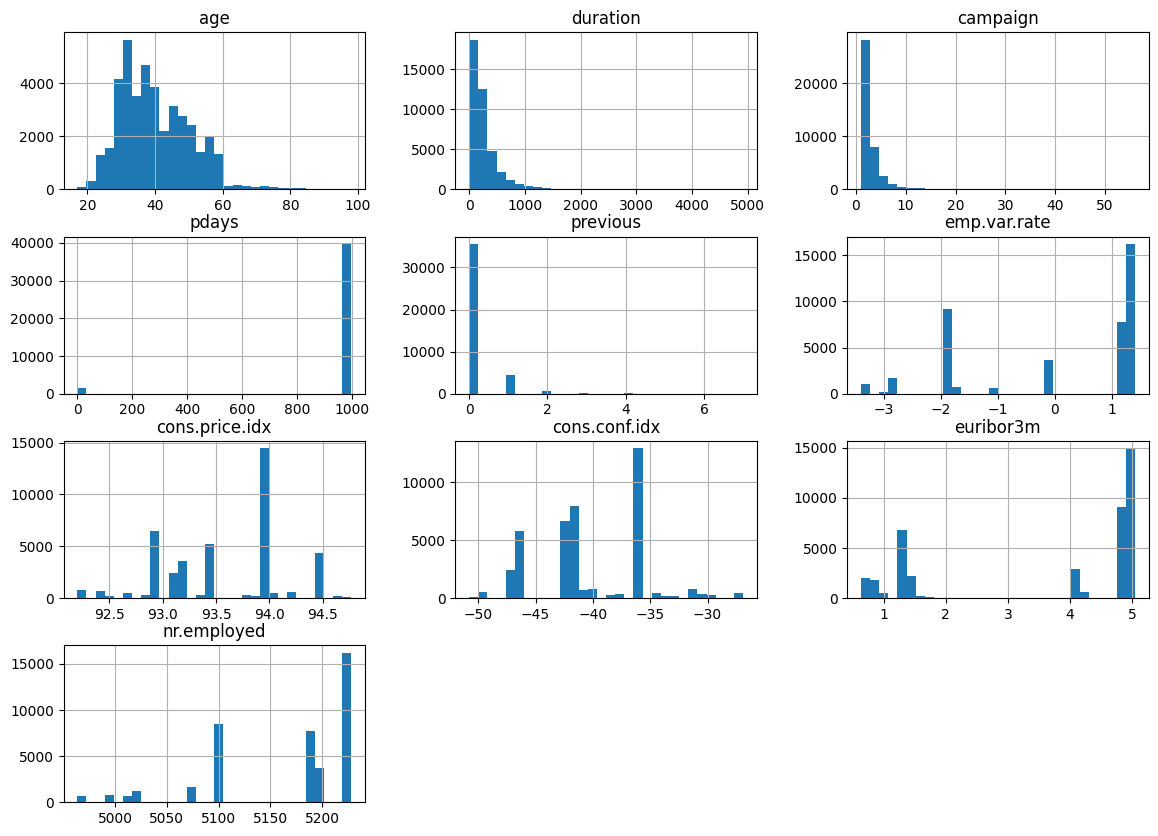

In [34]:
data[numcols].hist(figsize=(14, 10), bins=30)
plt.show()

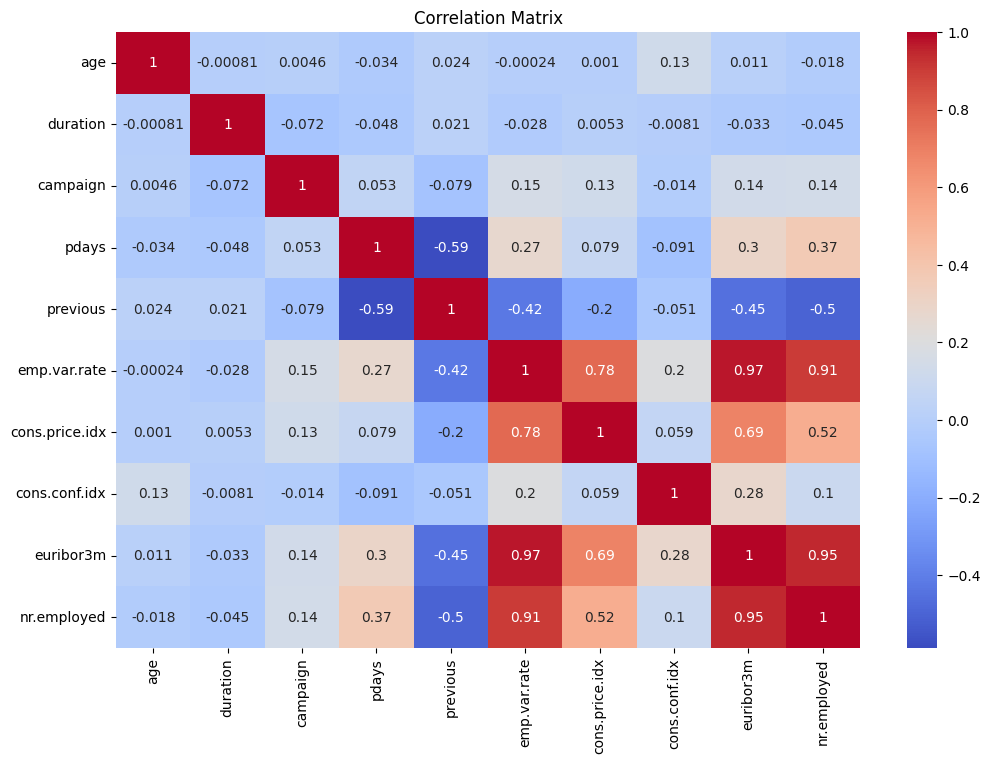

In [35]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

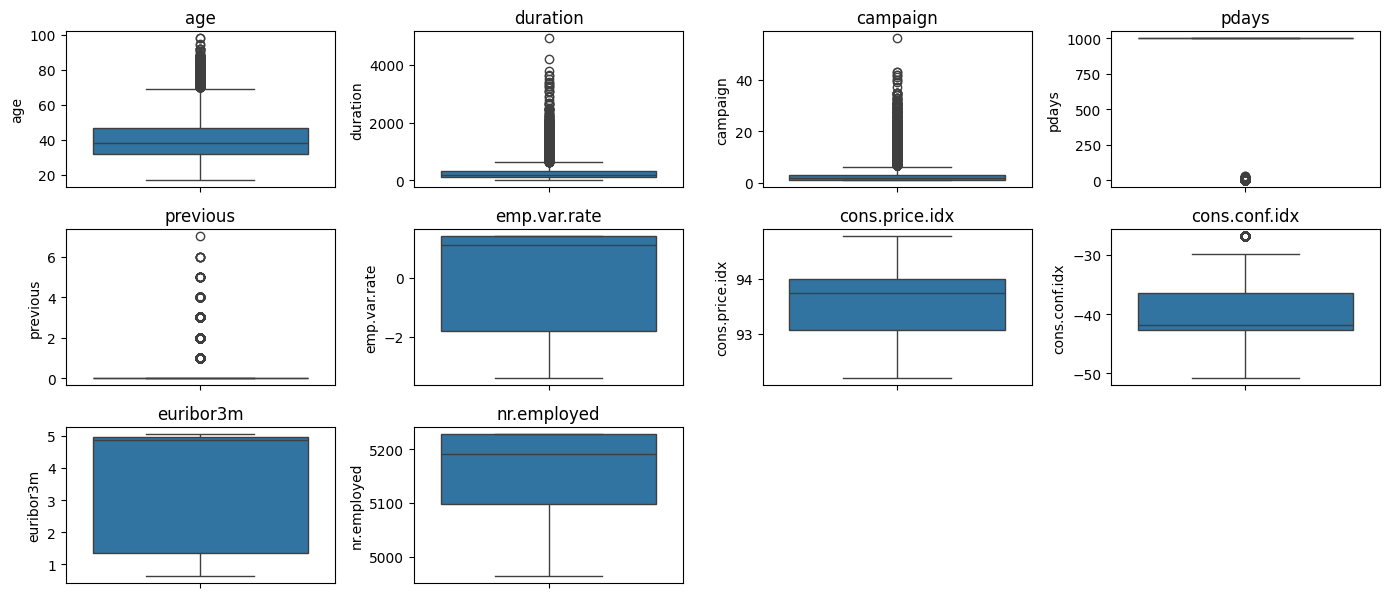

In [36]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numcols):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y=data[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

In [37]:
catcols = data.select_dtypes(include=['object']).columns
catcols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

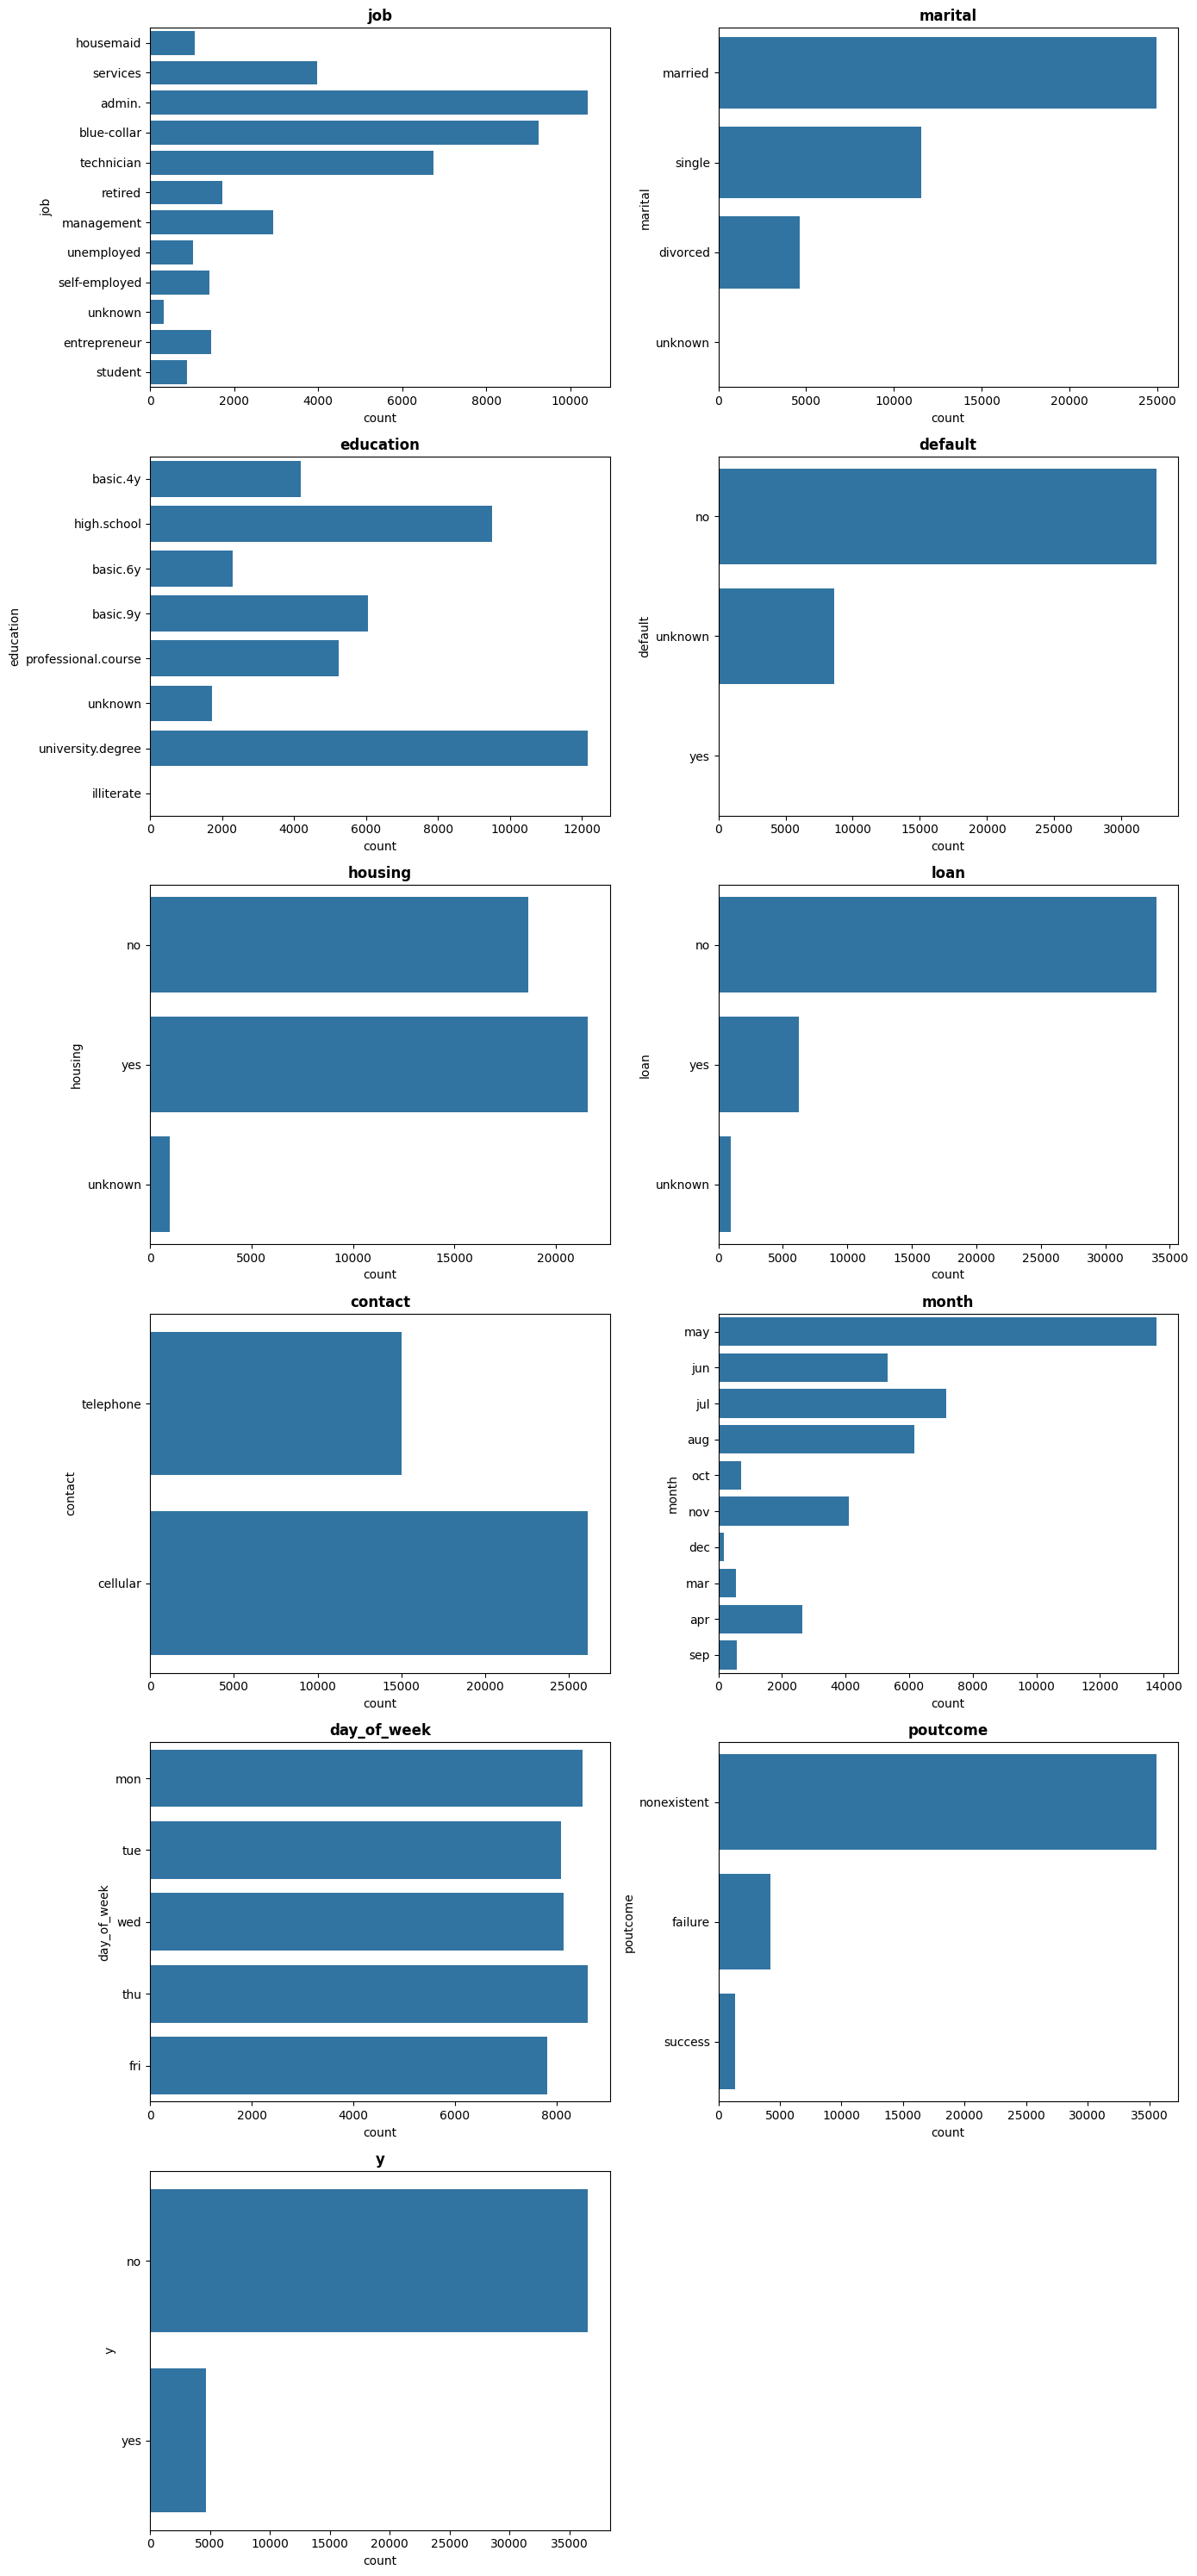

In [38]:
num_cols = 2
num_rows = math.ceil(len(catcols) / num_cols)

plt.figure(figsize=(14, num_rows * 5))
for i, feature in enumerate(catcols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(y=data[feature])
    plt.title(feature, fontweight='bold')

plt.tight_layout()
plt.show()

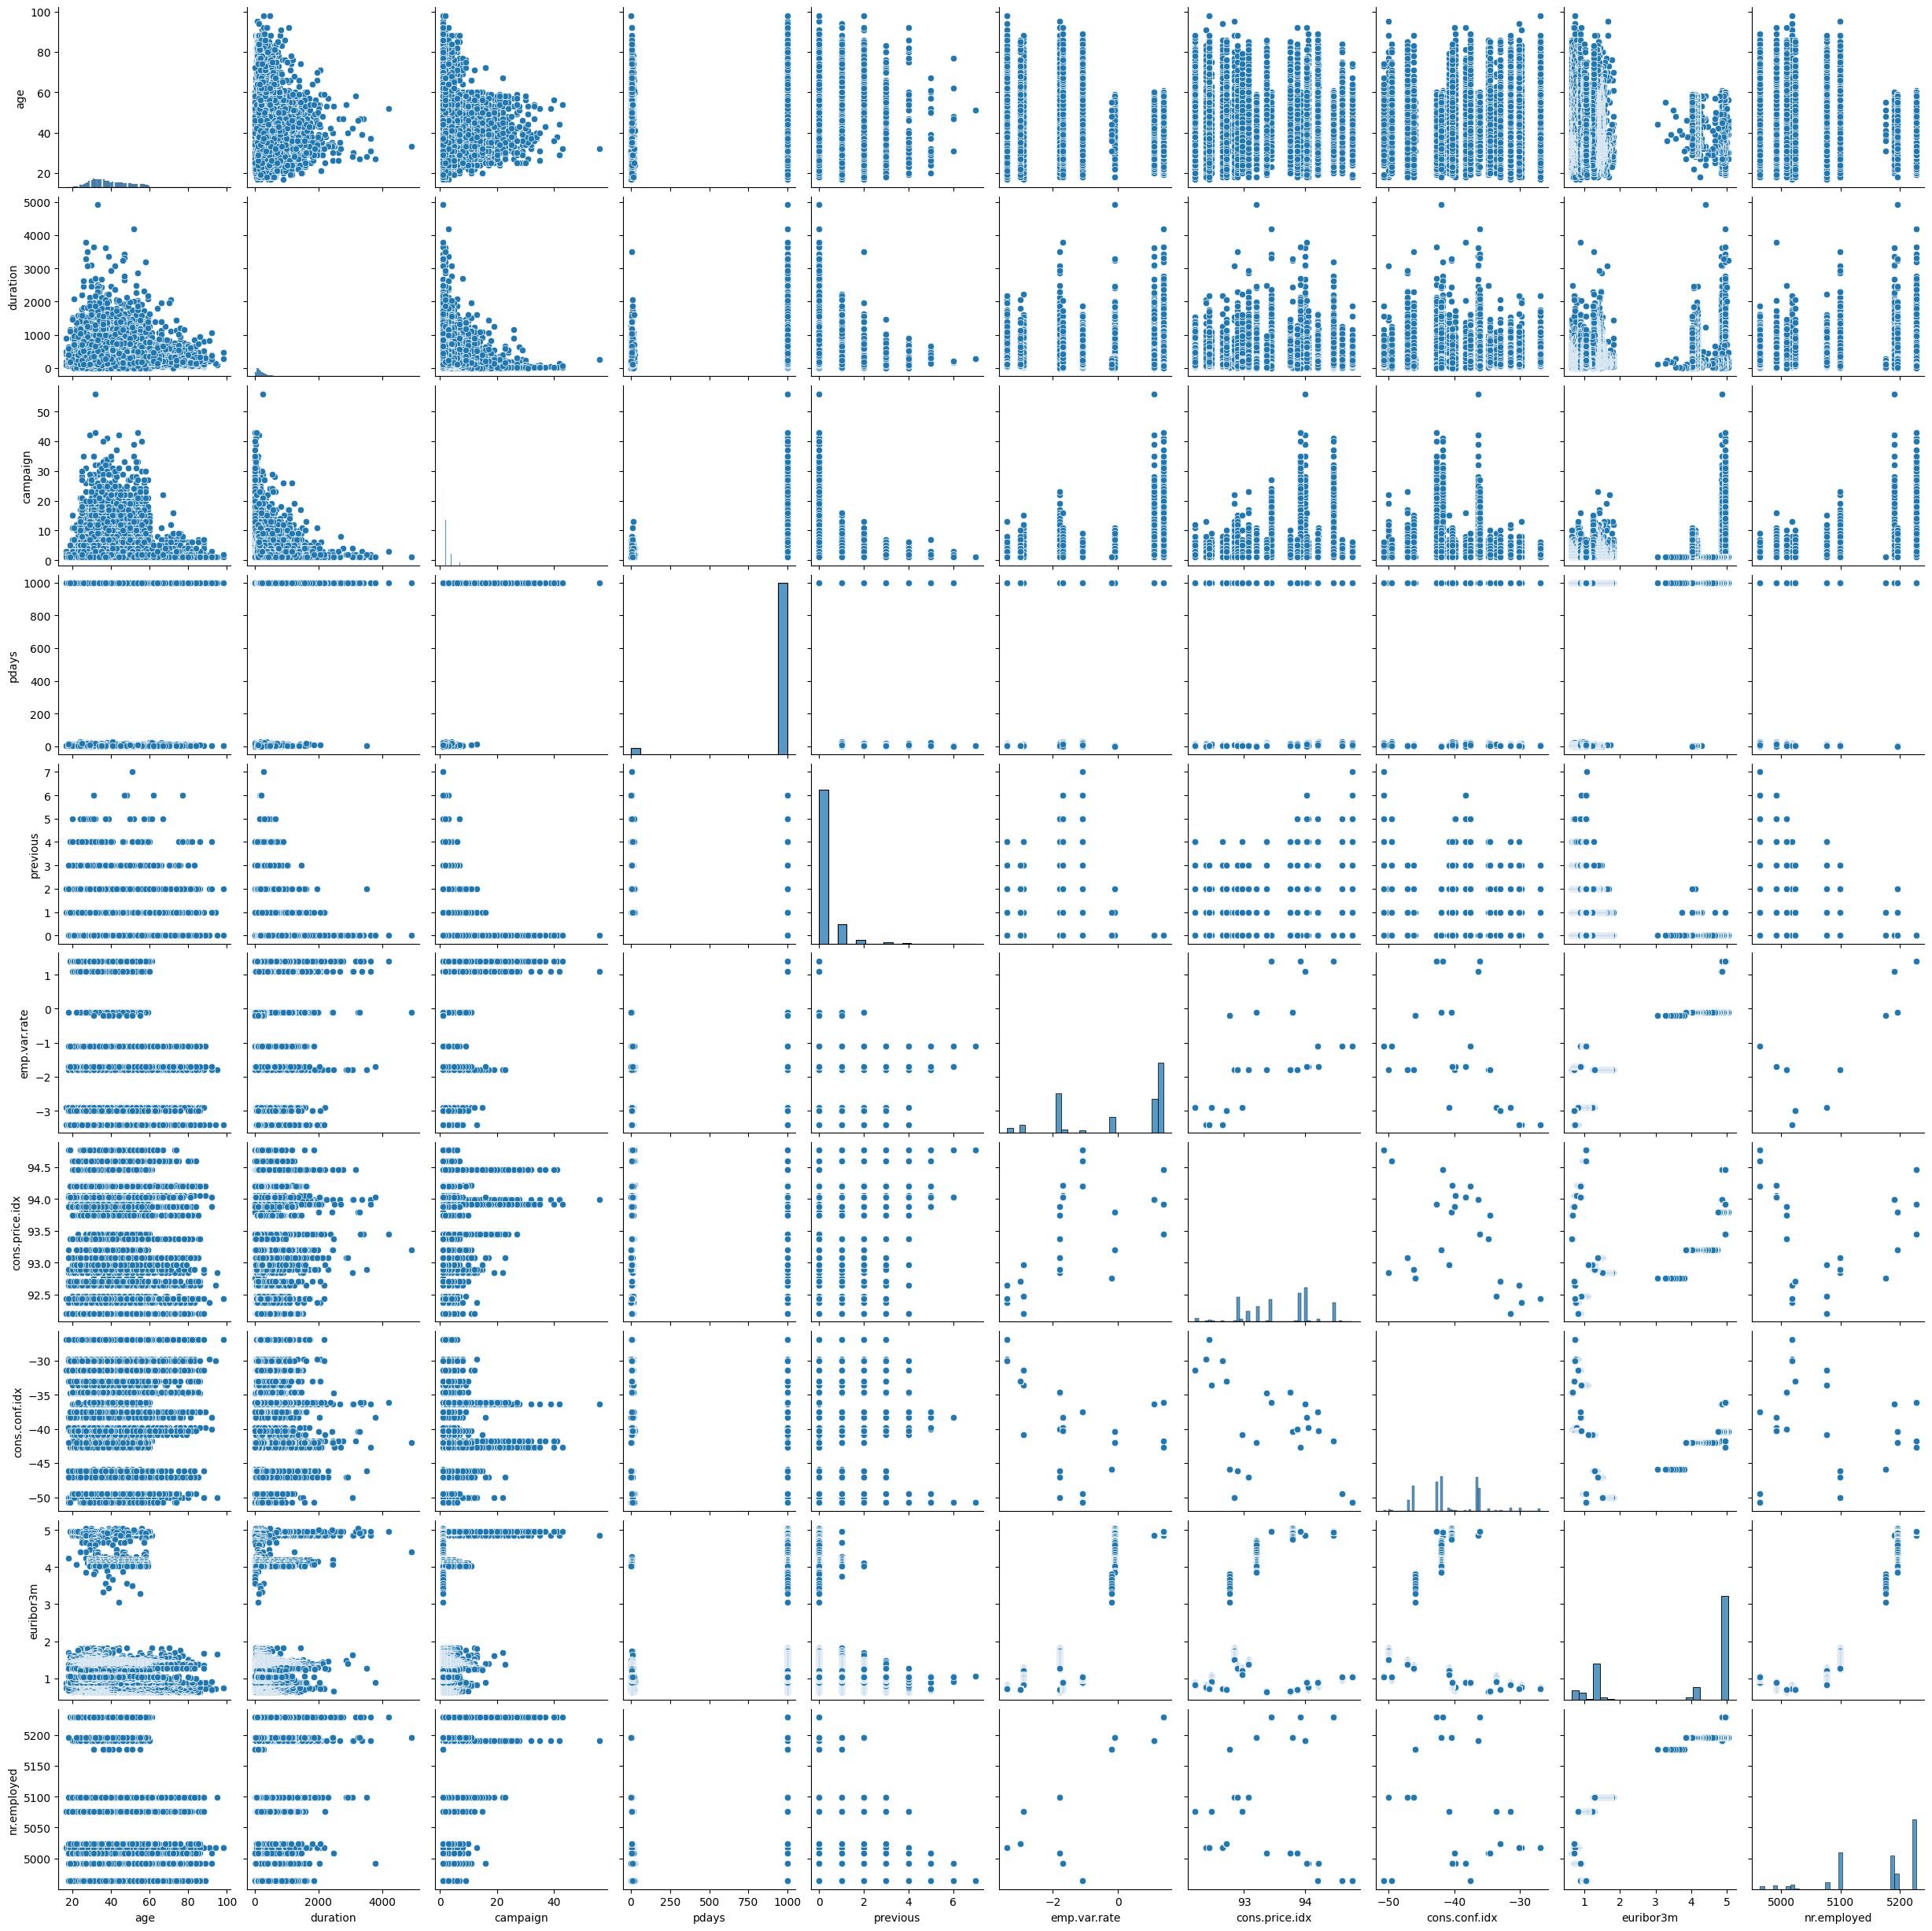

In [39]:
sns.pairplot(data[numcols])
plt.show()

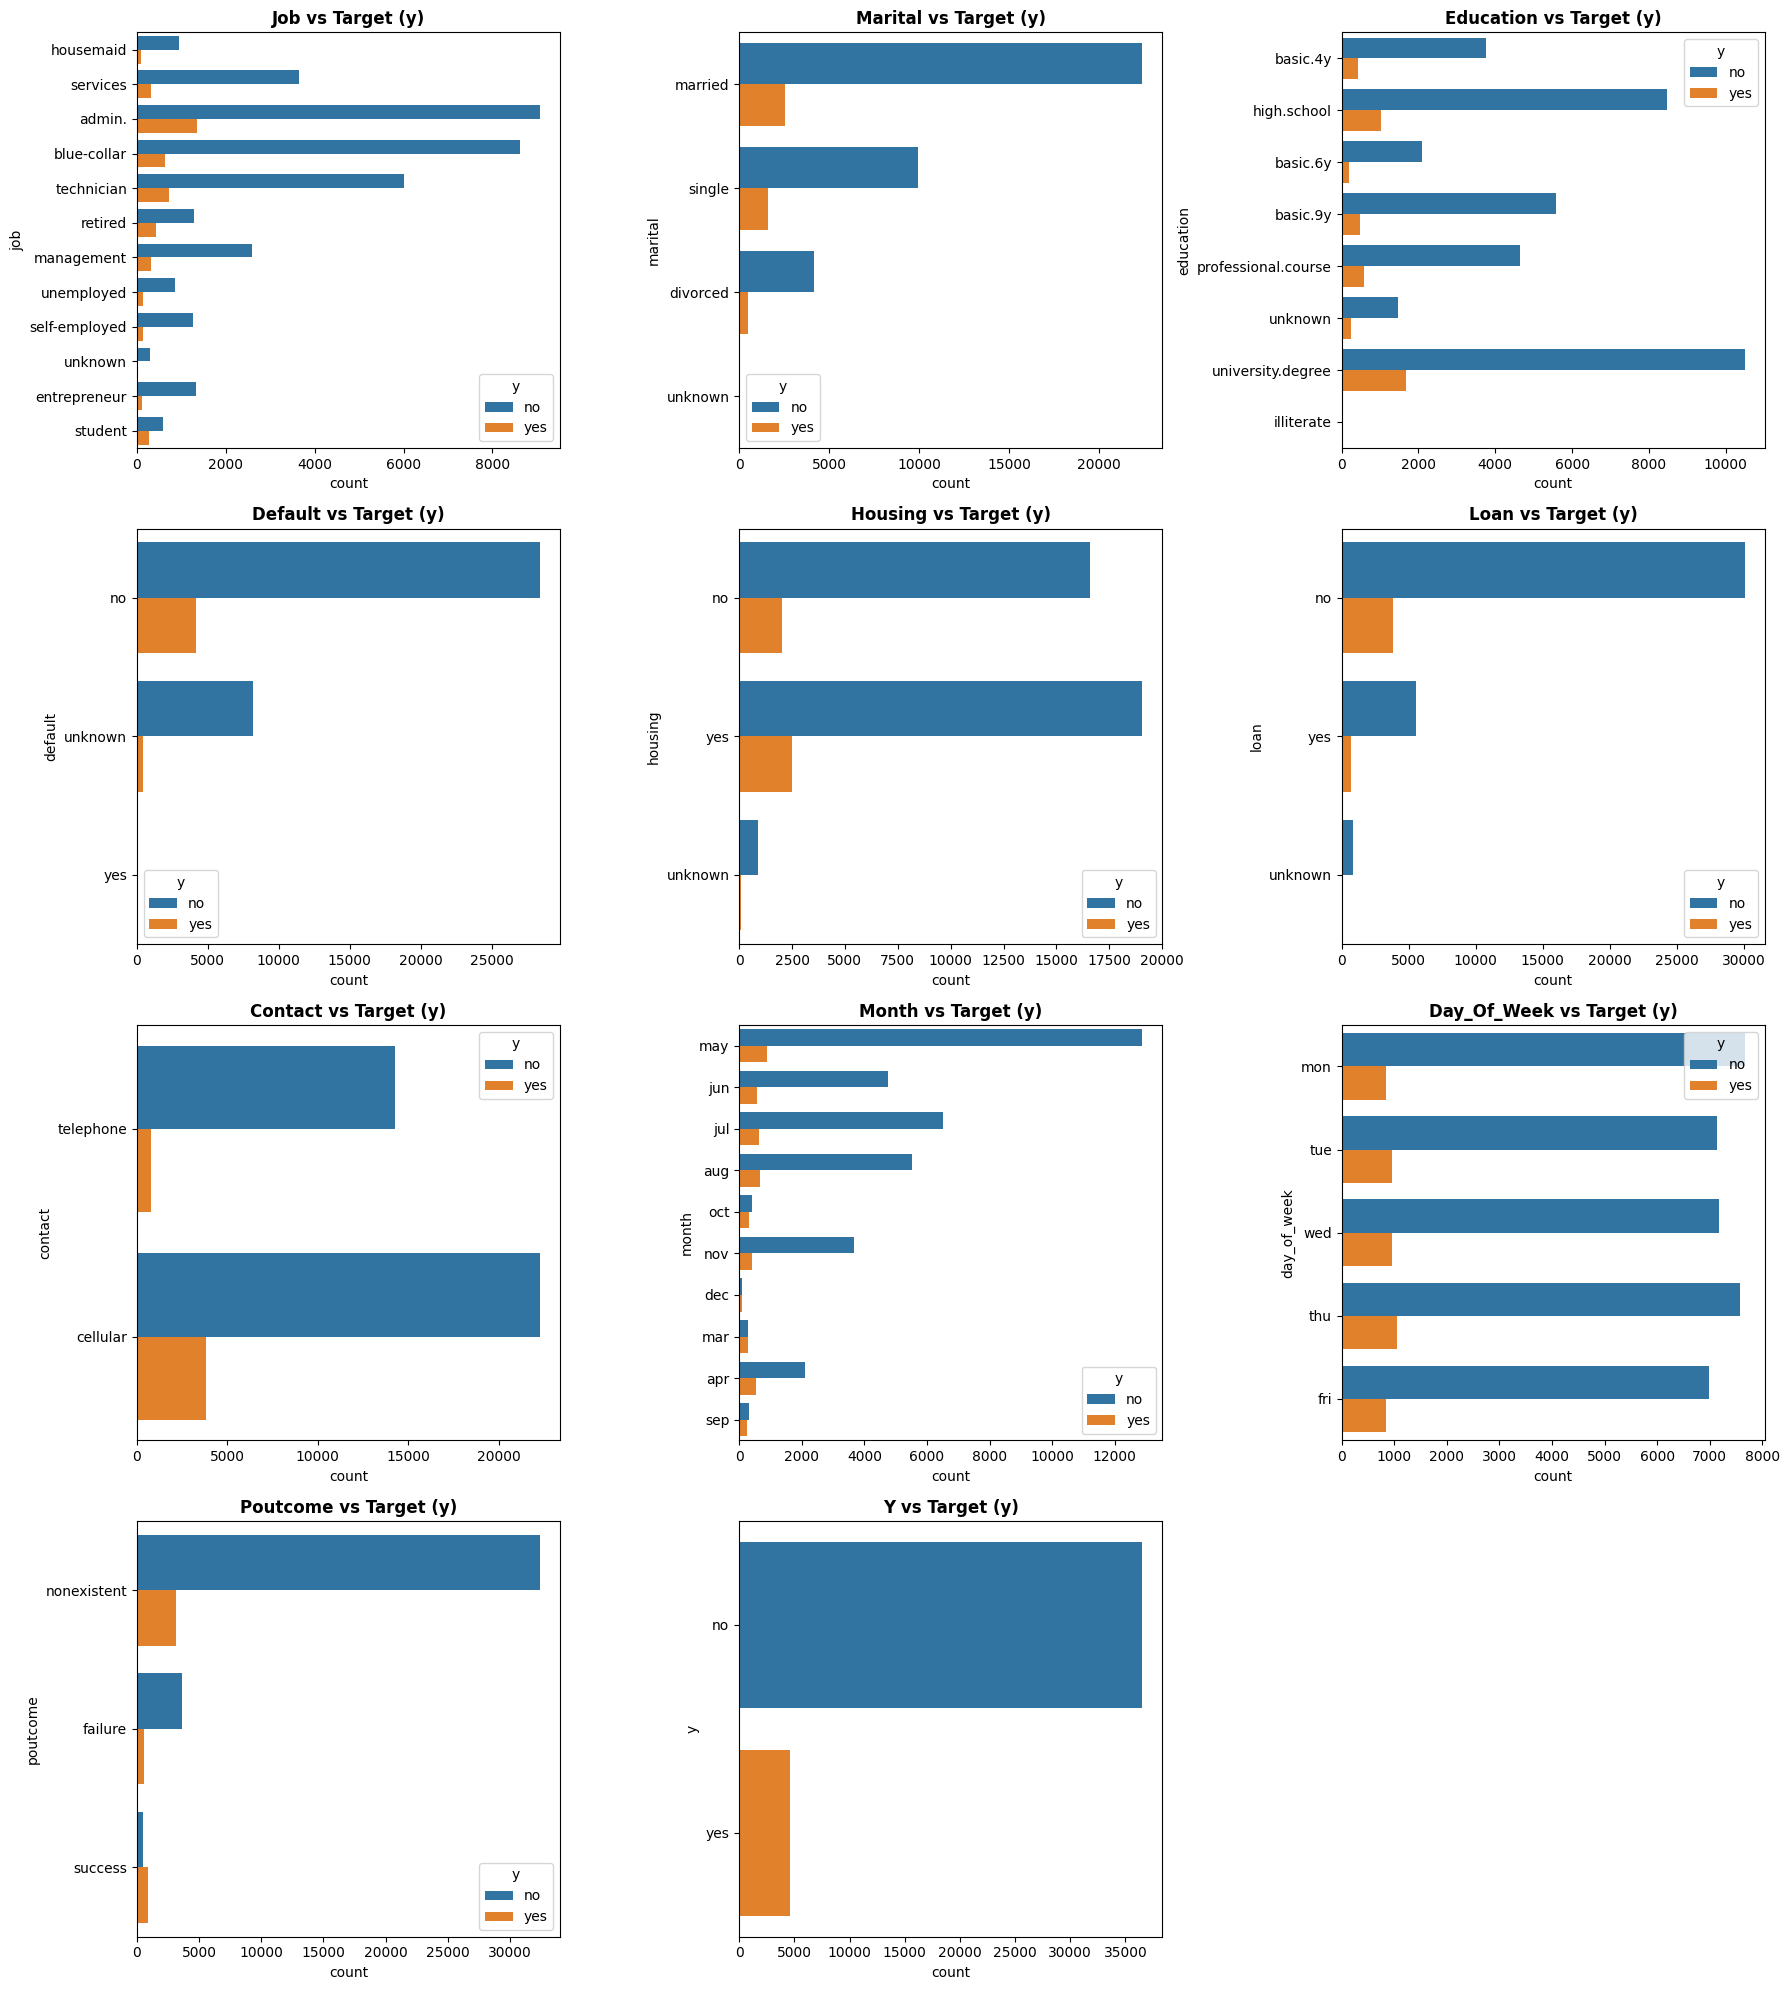

In [40]:
num_cols = 3
num_rows = math.ceil(len(catcols) / num_cols)

plt.figure(figsize=(18, num_rows * 5))
for i, feature in enumerate(catcols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(y=data[feature], hue=data['y'])
    plt.title(f"{feature.title()} vs Target (y)", fontweight='bold')

plt.tight_layout()
plt.show()

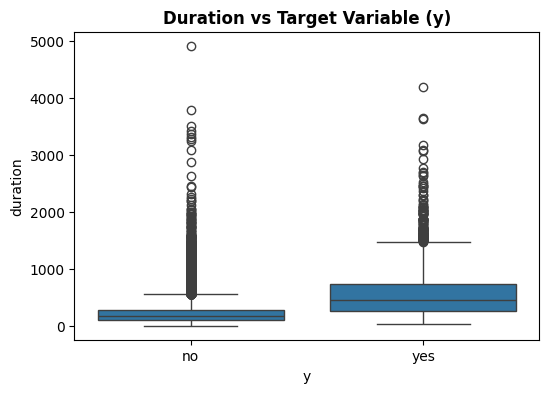

In [41]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='y', y='duration', data=data)
plt.title('Duration vs Target Variable (y)',fontweight='bold')
plt.show()

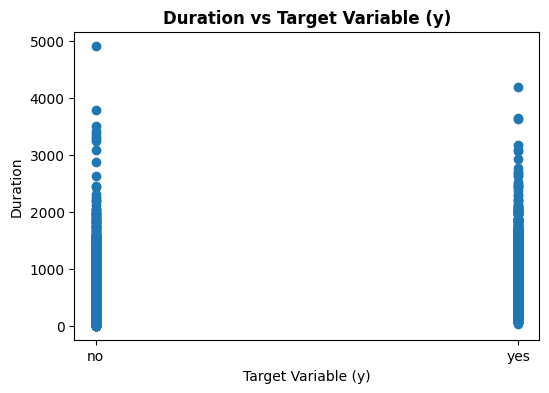

In [42]:
plt.figure(figsize=(6, 4))
plt.scatter(data['y'], data['duration'])
plt.title('Duration vs Target Variable (y)', fontweight='bold')
plt.xlabel('Target Variable (y)')
plt.ylabel('Duration')
plt.show()

In [43]:
print("\nClass Distribution in Target Variable (y):")
print(data['y'].value_counts(normalize=True))


Class Distribution in Target Variable (y):
no     0.887337
yes    0.112663
Name: y, dtype: float64


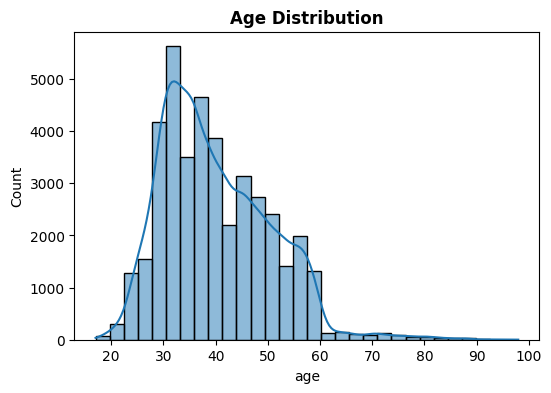

In [44]:
plt.figure(figsize=(6, 4))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution',fontweight='bold')
plt.show()

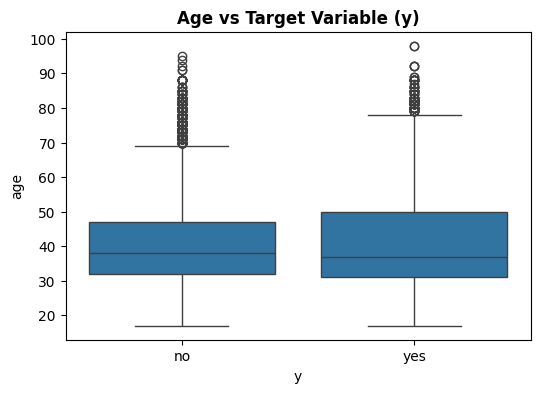

In [45]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='y', y='age', data=data)
plt.title('Age vs Target Variable (y)',fontweight='bold')
plt.show()

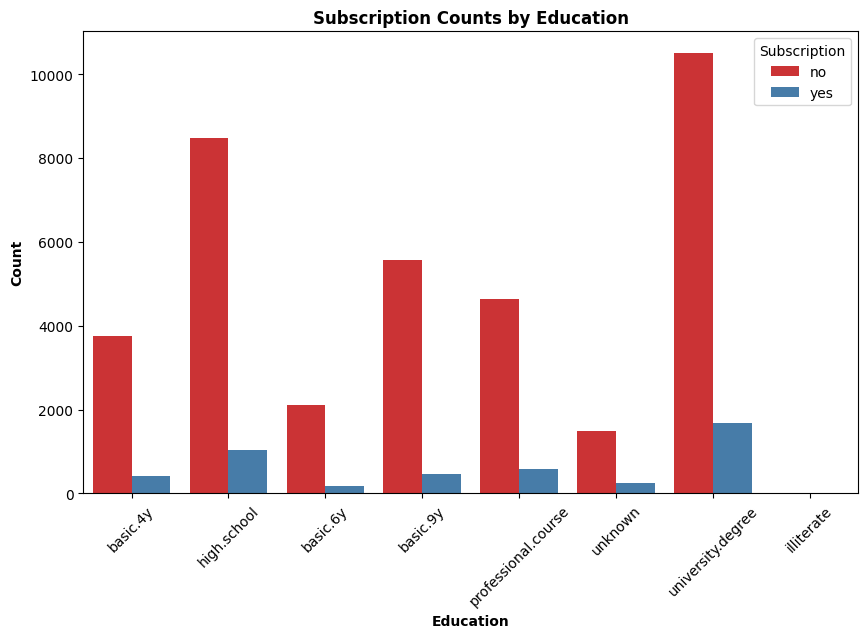

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='education', hue='y',palette='Set1')
plt.xlabel('Education',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Subscription Counts by Education',fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Subscription')
plt.show()

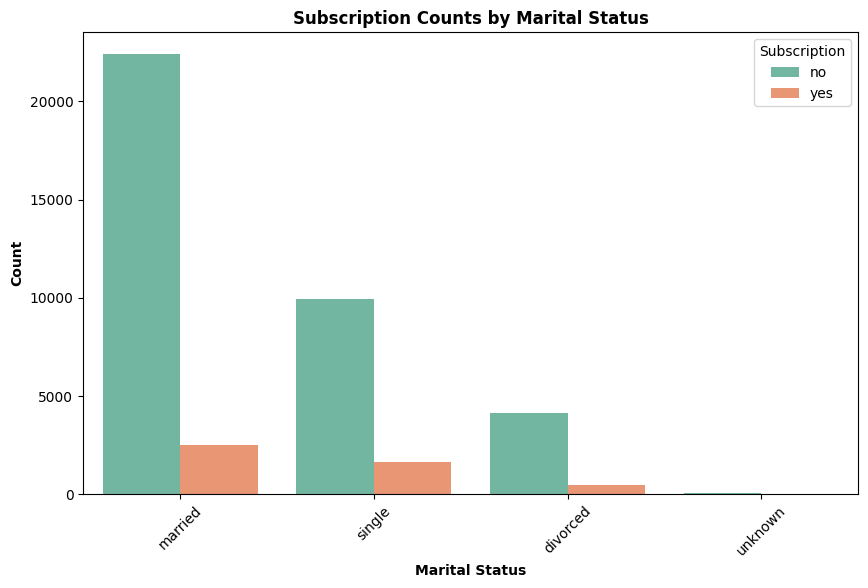

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='marital', hue='y',palette='Set2')
plt.xlabel('Marital Status',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Subscription Counts by Marital Status',fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Subscription')
plt.show()

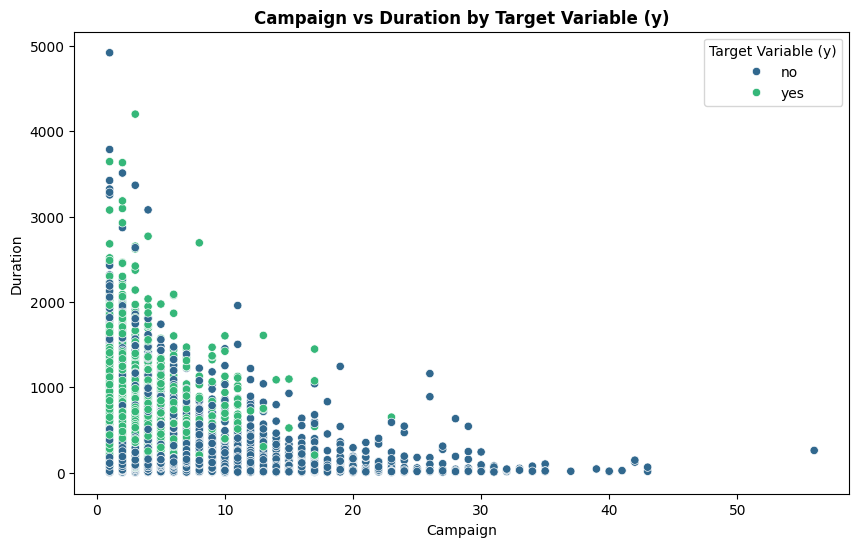

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="campaign", y="duration", hue="y", palette="viridis")
plt.title('Campaign vs Duration by Target Variable (y)', fontweight='bold')
plt.xlabel('Campaign')
plt.ylabel('Duration')
plt.legend(title='Target Variable (y)')
plt.show()

<Axes: xlabel='cons.price.idx', ylabel='marital'>

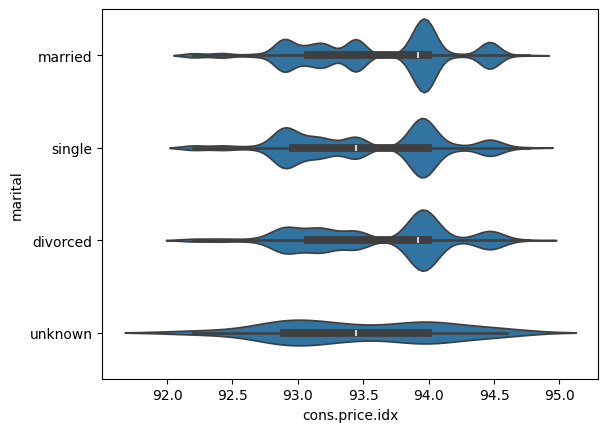

In [49]:
sns.violinplot( y=data["marital"], x=data["cons.price.idx"] )

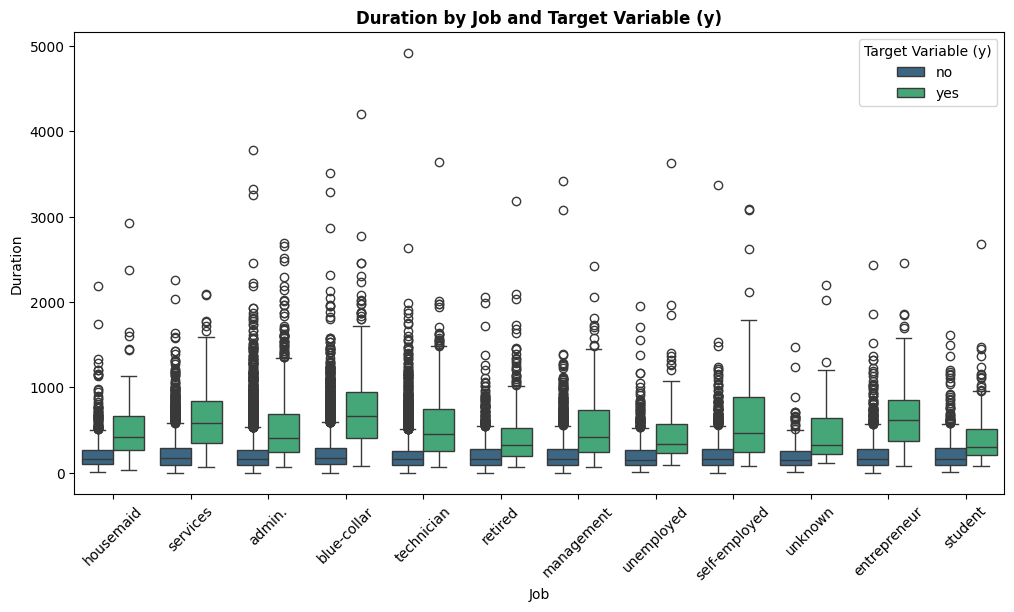

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="job", y="duration", hue="y", palette="viridis")
plt.title('Duration by Job and Target Variable (y)', fontweight='bold')
plt.xlabel('Job')
plt.ylabel('Duration')
plt.legend(title='Target Variable (y)')
plt.xticks(rotation=45) 
plt.show()

<BarContainer object of 41176 artists>

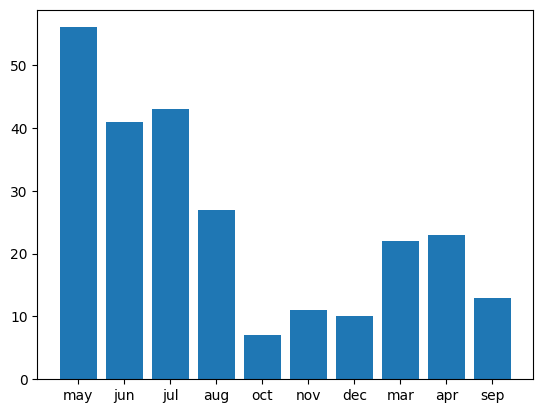

In [51]:
plt.bar(data['month'], data['campaign'])

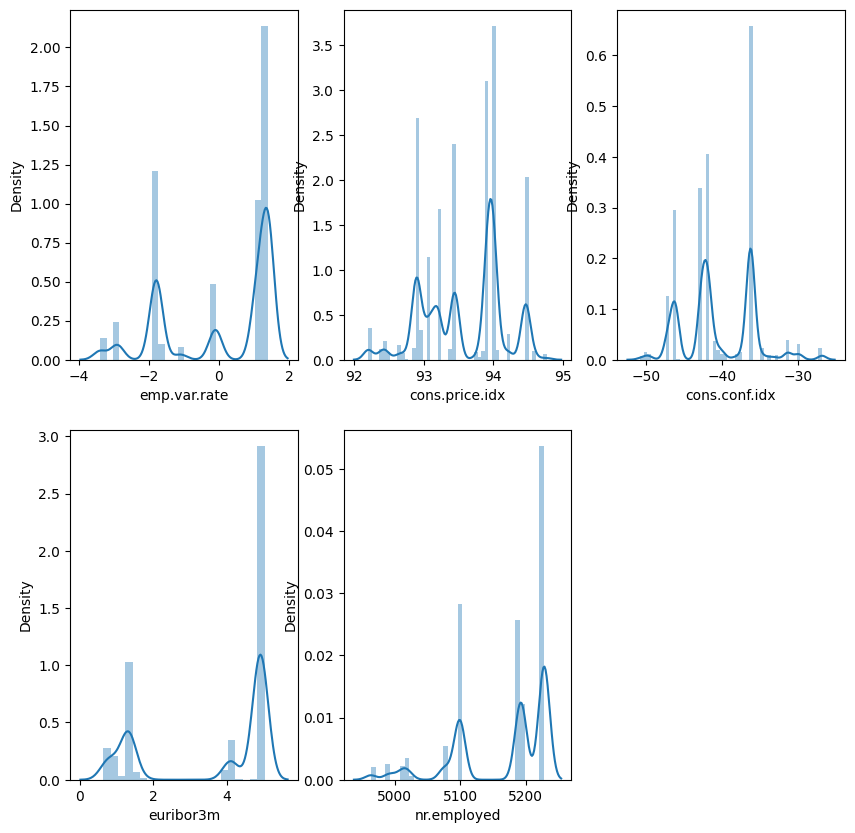

In [52]:
plt.subplot(231)
sns.distplot(data['emp.var.rate'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(data['cons.price.idx'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(data['cons.conf.idx'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(data['euribor3m'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(data['nr.employed'])
fig = plt.gcf()
fig.set_size_inches(10,10)

In [53]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [54]:
data = remove_outliers_iqr(data)

In [55]:
le = LabelEncoder()
data=data.apply(lambda x:le.fit_transform(x))

In [56]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,38,3,1,0,0,0,0,1,6,1,...,0,0,0,0,8,17,16,272,8,0
1,39,7,1,3,1,0,0,1,6,1,...,0,0,0,0,8,17,16,272,8,0
2,19,7,1,3,0,2,0,1,6,1,...,0,0,0,0,8,17,16,272,8,0
3,22,0,1,1,0,0,0,1,6,1,...,0,0,0,0,8,17,16,272,8,0
4,38,7,1,3,0,0,2,1,6,1,...,0,0,0,0,8,17,16,272,8,0


In [57]:
X = data.drop('y', axis=1)
y = data['y']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    return accuracy, precision, recall, roc_auc

In [61]:
models = {}

# Logistic Regression

In [62]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
models['Logistic Regression'] = evaluate_model(logmodel, X_test, y_test)

# Decision Tree Classifier

In [63]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
models['Decision Tree'] = evaluate_model(dt, X_test, y_test)

# Decision Tree Classifier with Hyperparameter Tuning

In [64]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_
models['Tuned Decision Tree'] = evaluate_model(best_dt, X_test, y_test)

# Random Forest Classifier

In [65]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
models['Random Forest'] = evaluate_model(rfc, X_test, y_test)

# Random Forest Classifier with Hyperparameter Tuning

In [66]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rfc = grid_search_rf.best_estimator_
models['Tuned Random Forest'] = evaluate_model(best_rfc, X_test, y_test)

# K-Neighbors Classifier

In [67]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
models['K-Neighbors'] = evaluate_model(knn, X_test, y_test)

# Naive Bayes Classifier

In [68]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
models['Naive Bayes'] = evaluate_model(naive_bayes, X_test, y_test)

# Support Vector Machine (SVM)

In [69]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
models['SVM'] = evaluate_model(svm, X_test, y_test)

# XGBoost Classifier

In [70]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
models['XGBoost'] =evaluate_model(xgb, X_test, y_test)

In [71]:
for model, performance in models.items():
    print(f"Model: {model}")
    print('============================================')
    print(f"Accuracy: {performance[0]}")
    print(f"Precision: {performance[1]}")
    print(f"Recall: {performance[2]}")
    print(f"AUC-ROC: {performance[3]}")
    print('============================================')
    print("\n")

Model: Logistic Regression
Accuracy: 0.9488193300384404
Precision: 0.529126213592233
Recall: 0.2280334728033473
AUC-ROC: 0.9101827336866402


Model: Decision Tree
Accuracy: 0.9332235035694674
Precision: 0.3886986301369863
Recall: 0.47489539748953974
AUC-ROC: 0.7167568444501136


Model: Tuned Decision Tree
Accuracy: 0.9534321801208128
Precision: 0.5985401459854015
Recall: 0.34309623430962344
AUC-ROC: 0.9161218088777424


Model: Random Forest
Accuracy: 0.9525535420098846
Precision: 0.5782312925170068
Recall: 0.35564853556485354
AUC-ROC: 0.9445616394573232


Model: Tuned Random Forest
Accuracy: 0.9535420098846787
Precision: 0.6104417670682731
Recall: 0.3179916317991632
AUC-ROC: 0.9466632684289326


Model: K-Neighbors
Accuracy: 0.9453047775947282
Precision: 0.4532710280373832
Recall: 0.20292887029288703
AUC-ROC: 0.8144272409332769


Model: Naive Bayes
Accuracy: 0.8555738605161999
Precision: 0.22412656558998023
Recall: 0.7112970711297071
AUC-ROC: 0.8730030705389765


Model: SVM
Accuracy: 0.

In [72]:
model_performance = pd.DataFrame(models, index=['Accuracy', 'Precision', 'Recall', 'AUC-ROC'])
model_performance.transpose()

,Accuracy,Precision,Recall,AUC-ROC
Logistic Regression,0.948819,0.529126,0.228033,0.910183
Decision Tree,0.933224,0.388699,0.474895,0.716757
Tuned Decision Tree,0.953432,0.598540,0.343096,0.916122
Random Forest,0.952554,0.578231,0.355649,0.944562
Tuned Random Forest,0.953542,0.610442,0.317992,0.946663
K-Neighbors,0.945305,0.453271,0.202929,0.814427
Naive Bayes,0.855574,0.224127,0.711297,0.873003
SVM,0.950247,0.585034,0.179916,0.887978
XGBoost,0.948819,0.515544,0.416318,0.949235


In [73]:
model_performance

,Logistic Regression,Decision Tree,Tuned Decision Tree,Random Forest,Tuned Random Forest,K-Neighbors,Naive Bayes,SVM,XGBoost
Accuracy,0.948819,0.933224,0.953432,0.952554,0.953542,0.945305,0.855574,0.950247,0.948819
Precision,0.529126,0.388699,0.598540,0.578231,0.610442,0.453271,0.224127,0.585034,0.515544
Recall,0.228033,0.474895,0.343096,0.355649,0.317992,0.202929,0.711297,0.179916,0.416318
AUC-ROC,0.910183,0.716757,0.916122,0.944562,0.946663,0.814427,0.873003,0.887978,0.949235


# Applying SMOTE Due to Imbalanced Dataset

In [74]:
X = data.drop('y', axis=1)
y = data['y']

In [75]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Tuned Decision Tree': GridSearchCV(DecisionTreeClassifier(), {'max_depth': [3, 5, 7, 10]}, cv=5, scoring='accuracy'),
    'Random Forest': RandomForestClassifier(),
    'Tuned Random Forest': GridSearchCV(RandomForestClassifier(), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}, cv=5, scoring='accuracy'),
    'K-Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [79]:
def evaluate_models(X_train, X_test, y_train, y_test, models):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        auc_roc = roc_auc_score(y_test, y_pred)
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'AUC-ROC': auc_roc
        })
    results_df = pd.DataFrame(results)
    return results_df

In [80]:
results_resampled = evaluate_models(X_train, X_test, y_train, y_test, models)
print("\033[1m\nModel Performance Metrics:\033[0m")
print("\033[1m===========================================\033[0m")
results_resampled


Model Performance Metrics:


,Model,Accuracy,Precision,Recall,AUC-ROC
0,Logistic Regression,0.878463,0.867871,0.895582,0.878298
1,Decision Tree,0.958616,0.951145,0.967725,0.958528
2,Tuned Decision Tree,0.942150,0.915049,0.976010,0.941823
3,Random Forest,0.975170,0.964268,0.987401,0.975052
4,Tuned Random Forest,0.974037,0.962471,0.987056,0.973911
5,K-Neighbors,0.944590,0.911586,0.985847,0.944190
6,Naive Bayes,0.844311,0.840442,0.853642,0.844221
7,SVM,0.939362,0.916639,0.967898,0.939086
8,XGBoost,0.969942,0.959521,0.981878,0.969827


In [81]:
best_accuracy_model = results_resampled.loc[results_resampled['Accuracy'].idxmax()]
best_precision_model = results_resampled.loc[results_resampled['Precision'].idxmax()]
best_recall_model = results_resampled.loc[results_resampled['Recall'].idxmax()]
best_auc_roc_model = results_resampled.loc[results_resampled['AUC-ROC'].idxmax()]

In [82]:
print("\033[1m\nOverall Best Model based on Accuracy:\033[0m")
print(best_accuracy_model)
print("\033[1m==========================\033[0m")
print("\033[1m\nOverall Best Model based on Precision:\033[0m")
print(best_precision_model)
print("\033[1m==========================\033[0m")
print("\033[1m\nOverall Best Model based on Recall:\033[0m")
print(best_recall_model)
print("\033[1m==========================\033[0m")
print("\033[1m\nOverall Best Model based on AUC-ROC:\033[0m")
print(best_auc_roc_model)
print("\033[1m==========================\033[0m")


Overall Best Model based on Accuracy:
Model        Random Forest
Accuracy           0.97517
Precision         0.964268
Recall            0.987401
AUC-ROC           0.975052
Name: 3, dtype: object

Overall Best Model based on Precision:
Model        Random Forest
Accuracy           0.97517
Precision         0.964268
Recall            0.987401
AUC-ROC           0.975052
Name: 3, dtype: object

Overall Best Model based on Recall:
Model        Random Forest
Accuracy           0.97517
Precision         0.964268
Recall            0.987401
AUC-ROC           0.975052
Name: 3, dtype: object

Overall Best Model based on AUC-ROC:
Model        Random Forest
Accuracy           0.97517
Precision         0.964268
Recall            0.987401
AUC-ROC           0.975052
Name: 3, dtype: object
